# Phaedrus text analysis and character/topic mapping

taken from: http://www.gutenberg.org/files/1636/1636-h/1636-h.htm

In [23]:
import numpy as np
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import string
import re


Read in the table and index by row number

In [24]:
phaedrus = Table.read_table('Phaedro.txt', names = ['line'])
phaedrus.append_column('line #', np.arange(1,phaedrus.num_rows+1))

Create helper functions that separate the speaker from the quote and add them to the table

In [25]:
def name_separator(line):
    name = line[:8]
    if (name == 'PHAEDRUS') or (name == 'SOCRATES'):
        return name
    else:
        return 'no speaker'

def line_separator(line):
    name = line[:8]
    if (name == 'PHAEDRUS') or (name == 'SOCRATES'):
        return line [10:]
    else:
        return line

phaedrus.append_column('speaker', phaedrus.apply(name_separator, 'line'))
phaedrus.append_column('quote', phaedrus.apply(line_separator, 'line'))
phaedrus = phaedrus.drop('line')
phaedrus

line #,speaker,quote
1,PHAEDRUS,Let us talk.
2,SOCRATES,Shall we discuss the rules of writing and speech as we w ...
3,PHAEDRUS,Very good.
4,SOCRATES,In good speaking should not the mind of the speaker know ...
5,PHAEDRUS,"And yet, Socrates, I have heard that he who would be an ..."
6,SOCRATES,The words of the wise are not to be set aside; for there ...
7,PHAEDRUS,Very true.
8,SOCRATES,Let us put the matter thus:—Suppose that I persuaded you ...
9,PHAEDRUS,That would be ridiculous.
10,SOCRATES,"There is something more ridiculous coming:—Suppose, furt ..."


Interactive widget that can give the most popular words of a certain character

In [26]:
def word_freq(speaker, table, removed = False):
    common_words = ['the','that','of','is','i','which','he','and','a','you','that','what','in']
    spkr_table = table.where(table['speaker'] == speaker.upper())
    wdict = {}
    for line in spkr_table['quote']:
        line = line.split(' ')
        for word in line:
            word = word.lower()
            exclude = set(string.punctuation)
            word = ''.join(char for char in word if char not in exclude)
            if word not in wdict:
                wdict[word] = 1
            else:
                wdict[word] += 1
    speaker_frequencies = Table().with_columns(['word', wdict.keys(), 'frequency', wdict.values()])
    speaker_frequencies = speaker_frequencies.sort('frequency', descending = True)
    if removed:
        def select_values(table, column, vals):
            lst = []
            for i in range(len(table[column])):
                val = table[column][i]
                if val not in vals:
                    lst.append(i)
            return lst
        speaker_frequencies = speaker_frequencies.take(select_values(speaker_frequencies, 'word', common_words))
    return speaker_frequencies

interact(word_freq, speaker=['Phaedrus', 'Socrates'], table = fixed(phaedrus), common_words = False)

word,frequency
to,20
be,15
not,14
true,12
socrates,10
have,10
yes,10
how,9
they,9
would,9


In [27]:
def visualizer(table, string = False, normed = False, Socrates = True, Phaedrus = True):
    test_table = table.copy()
    if string:
        def string_searcher(line):
            return re.findall(string, line)
        test_table['quote'] = test_table.apply(string_searcher, 'quote')
    socrat = test_table.where(test_table['speaker'] == 'SOCRATES')
    socrat.append_column('len', socrat.apply(len, 'quote'))
    phaed = test_table.where(test_table['speaker'] == 'PHAEDRUS')
    phaed.append_column('len', phaed.apply(len, 'quote'))
    if normed:
        phaed['len'] = [x/pha_total for x in phaed['len']]
        socrat['len'] = [x/soc_total for x in socrat['len']]
    if Phaedrus:
        plt.plot(np.arange(1,197,2), phaed['len'], color = 'blue')
    if Socrates:
        plt.plot(np.arange(0,196,2), socrat['len'], color = 'red')
    plt.legend(['Phaedrus', 'Socrates'], loc = 2)

In [28]:
soc_total = np.sum(word_freq('Socrates', phaedrus)['frequency'])
pha_total = np.sum(word_freq('Phaedrus', phaedrus)['frequency'])
print('Socrates said a total of', soc_total, 'words.')
print('Phaedrus said a total of', pha_total, 'words.')

Socrates said a total of 5004 words.
Phaedrus said a total of 905 words.


## Interactive word finder

This takes in any string and returns a grah of the amount of times that character says each of those words. The default is just the amount of words they say at all.

<function __main__.visualizer>

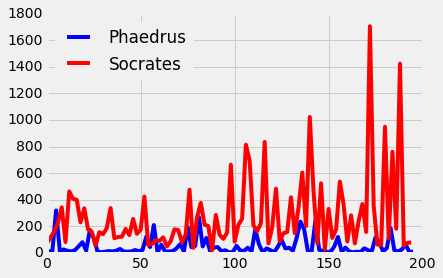

In [29]:
interact(visualizer, table = fixed(phaedrus), string = '', normed = False)